In [6]:
# !pip3 install redis
import redis

In [7]:
hostname = 'redis-13202.c251.east-us-mz.azure.cloud.redislabs.com'
port =13202
password= 'HZyi9HeBg1WZbw1uLstld28GvRbkbr4W'
r = redis.Redis(
    host =hostname,
    port =port,
    password =password
)

## Redis Lists

In [8]:
r.ping()

ConnectionError: Error 11001 connecting to redis-13202.c251.east-us-mz.azure.cloud.redislabs.com:13202. getaddrinfo failed.

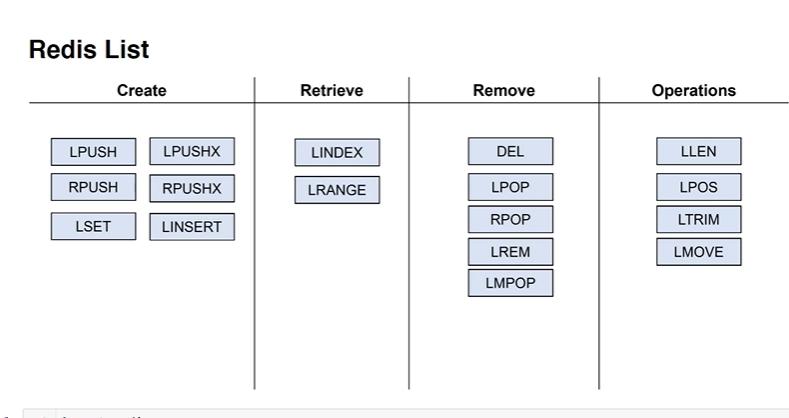

## Create a Redis Lists

In [9]:
r.lpush('mylist','value1') #this will create a list with name mylist with value value1

ConnectionError: Error 11001 connecting to redis-13202.c251.east-us-mz.azure.cloud.redislabs.com:13202. getaddrinfo failed.

In [10]:
#to retrieve a  list we need to use lindex, lrange 

In [11]:
r.lindex(name='mylist', index=0) #this will return a value in index 0 

ConnectionError: Error 11001 connecting to redis-13202.c251.east-us-mz.azure.cloud.redislabs.com:13202. getaddrinfo failed.

In [12]:
r.lrange(name='mylist', start =0, end = -1) # this command will rerurn all the values in the given range

ConnectionError: Error 11001 connecting to redis-13202.c251.east-us-mz.azure.cloud.redislabs.com:13202. getaddrinfo failed.

In [18]:
r.lpush('mylist','value_2')

2

In [19]:
r.lrange('mylist', 0,-1)

[b'value_2', b'value1']

In [20]:
r.rpush('mylist', 'value3')

3

In [21]:
r.lrange('mylist', 0,-1)

[b'value_2', b'value1', b'value3']

In [24]:
r.rpush('mylist', 'valule_4','valule_5')

7

In [25]:
r.lrange('mylist', 0,-1)

[b'value_2',
 b'value1',
 b'value3',
 b'valule_4',
 b'valule_4',
 b'valule_4',
 b'valule_5']

In [26]:
# lpushx(), rpushx()

In [31]:
r.lpushx('mylist1','somevalue')

0

In [32]:
r.lrange('mylist1', 0,-1)

[]

In [29]:
r.keys('*')

[b'herald',
 b'foo',
 b'key',
 b'HELSINKI',
 b'MSG',
 b'mykey1',
 b'message',
 b'mylist',
 b'mykey3']

In [33]:
r.lpushx('mylist','someval')

8

In [34]:
r.lrange('mylist',0,-1)

[b'someval',
 b'value_2',
 b'value1',
 b'value3',
 b'valule_4',
 b'valule_4',
 b'valule_4',
 b'valule_5']

In [38]:
r.linsert('mylist',where ='before',refvalue='value1',value='bibek')
#where before|after

9

In [39]:
r.lrange('mylist',0,-1)

[b'someval',
 b'value_2',
 b'bibek',
 b'value1',
 b'value3',
 b'valule_4',
 b'valule_4',
 b'valule_4',
 b'valule_5']

In [40]:
#insert a value 'value_5' to mylist after value_1

In [41]:
r.linsert('mylist' ,where ='after',refvalue='value1', value='value_5')

10

In [43]:
print(r.lrange('mylist',0,-1))

[b'someval', b'value_2', b'bibek', b'value1', b'value_5', b'value3', b'valule_4', b'valule_4', b'valule_4', b'valule_5']


In [44]:
r.lset('mylist',index=0,value='value_6')
#lset modifies or change the existing list for a given index
print(r.lrange('mylist',0,-1))

[b'value_6', b'value_2', b'bibek', b'value1', b'value_5', b'value3', b'valule_4', b'valule_4', b'valule_4', b'valule_5']


### Remove command
- Lpop,Rpop, Lmpop, Lrem 

In [48]:
# Lpop
r.lpop('mylist')

b'value_6'

In [51]:
print(r.lrange('mylist',0,-1))

[b'value_2', b'bibek', b'value1', b'value_5', b'value3', b'valule_4', b'valule_4', b'valule_4', b'valule_5']


In [53]:
r.rpop('mylist') #this will remove and return the last element in the list

b'valule_5'

In [54]:
print(r.lrange('mylist',0,-1))

[b'value_2', b'bibek', b'value1', b'value_5', b'value3', b'valule_4', b'valule_4', b'valule_4']


In [56]:
#lrem : it will remove the first occurance of the value

In [57]:
r.lrem('mylist',count=0,value ='value3')

1

In [59]:
r.lrange('mylist',0,-1)

[b'value_2',
 b'bibek',
 b'value1',
 b'value_5',
 b'valule_4',
 b'valule_4',
 b'valule_4']

In [62]:
r.rpush('mylist1',*('ele1','ele2','ele3','ele4'))

4

In [63]:
r.lrange('mylist1',0,-1)

[b'ele1', b'ele2', b'ele3', b'ele4']

In [65]:
r.delete('mylist1')

1

In [66]:
r.lrange('mylist1',0,-1)

[]

### Operations
- LLEN
- LPOS
- LTRIM
- LMOVE


In [68]:
#LlEN
# numbers of value in the list
r.llen('mylist')

7

In [69]:
r.lrange('mylist',0,-1)

[b'value_2',
 b'bibek',
 b'value1',
 b'value_5',
 b'valule_4',
 b'valule_4',
 b'valule_4']

In [74]:
#Lposition
#Lpos - return the index of position of valuen in the list
r.lpos('mylist', value ='value_5')

3

In [75]:
#ltrim - slice the list
r.ltrim('mylist',start=0,end=2)

True

In [76]:
r.lrange('mylist',0,-1)

[b'value_2', b'bibek', b'value1']

In [83]:
#lmove
r.lrange('mylist',0,-1)


[b'bibek', b'value1']

In [85]:
r.rpush('mylist1',*('ele1','ele2','ele3'))
print(r.lrange('mylist1',0,-1))

[b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3', b'value_2', b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3']


In [86]:
r.lmove('mylist','mylist1',src='LEFT',dest='RIGHT')

b'bibek'

In [89]:
print(r.lrange('mylist1',0,-1))

[b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3', b'value_2', b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3', b'ele1', b'ele2', b'ele3', b'bibek']
